In [24]:
import pandas as pd
import requests
import os
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [25]:
url="https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Concrete%20Compressive%20Strength/Concrete_Data.xls"
    
if not os.path.exists("concrete.csv"):
    read_file = pd.read_excel(url)
    read_file.to_csv("concrete.csv", index=False)
    
df = pd.read_csv("concrete.csv")
print(df.shape)
df.head()

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [26]:
df= df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
                       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast Furnace Slag',
                      'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash',
                      'Water  (component 4)(kg in a m^3 mixture)':'Water',
                      'Superplasticizer (component 5)(kg in a m^3 mixture)':"Superplasticizer",
                      'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"Coarse Aggregate",
                      "Fine Aggregate (component 7)(kg in a m^3 mixture)":"Fine Aggregate",
                      "Age (day)":"Age",
                      'Concrete compressive strength(MPa, megapascals) ':"Compressive Strength"})
df["ACI Approved"]=df["Compressive Strength"]>31.026
df.head()

KeyError: 'Compressive Strength'

In [27]:
df["Age"].value_counts()

KeyError: 'Age'

In [28]:
df["ACI Approved"].value_counts() / len(df)

KeyError: 'ACI Approved'

KeyError: 'Age'

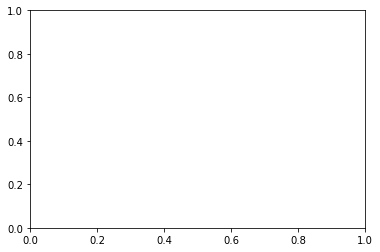

In [29]:
fig,ax=plt.subplots()
graph=ax.scatter(df["Age"],df["Compressive Strength"],alpha=.5,c=df["Water"])
ax.set_title("Figure 1: Age vs Concrete Strength",pad=20,size=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel("Compressive Strength (megapascals)",size=13)
ax.set_xlabel("Age (days)",size=13)
ax.plot([-10,500],[31.026,31.026],'r--',lw=2)
cbar=fig.colorbar(graph,ax=ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Water (kg in a m^3 mixture)', rotation=270,size=13)
fig.tight_layout()
fig.savefig('fig1.png')

In [30]:
df2=df[(df["Age"]<30)]
len(df2[df2["ACI Approved"]])/len(df2)

KeyError: 'Age'

In [31]:
df3=df[(df["Age"]>30)]
len(df3[df3["ACI Approved"]])/len(df3)

KeyError: 'Age'

In [ ]:
df4=df[(df["Age"]<30)]
df4=df4[df4["Water"]<181.5]
len(df4[df4["ACI Approved"]])/len(df4)

In [32]:
df5=df[(df["Age"]<30)]
df5=df5[df5["Water"]>181.5]
len(df5[df5["ACI Approved"]])/len(df5)

KeyError: 'Age'

In [33]:
train, test = train_test_split(df)
train.shape, test.shape

((772, 9), (258, 9))

In [34]:
xcols=['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age']
ycol='ACI Approved'

KeyError: "None of [Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',\n       'Coarse Aggregate', 'Fine Aggregate', 'Age'],\n      dtype='object')] are in the [columns]"

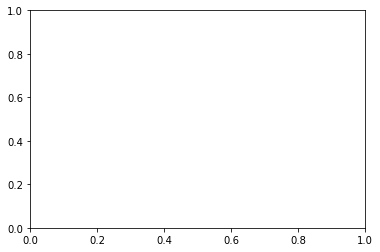

In [35]:
fig,ax=plt.subplots()
lr= Pipeline([
    ("pca", PCA())
])
lr.fit(df[xcols])
explained = lr["pca"].explained_variance_
variance = pd.Series(explained.cumsum() / explained.sum(),
              index=range(1, len(xcols)+1))
ax = variance.plot.line(label="not scaled", ylim=0)
lr= Pipeline([
    ("std", StandardScaler()),
    ("pca", PCA())
])
lr.fit(df[xcols])
explained = lr["pca"].explained_variance_
variance = pd.Series(explained.cumsum() / explained.sum(),
              index=range(1, len(xcols)+1))
variance.plot.line(label="scaled", ax=ax)
ax.set_xlabel("Number of Components",size=13)
ax.set_ylabel("Explained Variance",size=13)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(frameon=False, prop={'size': 13})
ax.set_title("Figure 2: Principal Components of Breaks", pad=20,size=15)
fig.tight_layout()
fig.savefig('fig2.png')

In [ ]:
variance[6]

In [36]:
variance[7]

NameError: name 'variance' is not defined

In [37]:
lr = Pipeline([
        ("std", StandardScaler()),
        ("lr", LogisticRegression()),
    ])
lr.fit(train[xcols],train[ycol])
print("Score: ",lr.score(test[xcols],test[ycol]))
print("Recall: ", recall_score(test[ycol], lr.predict(test[xcols])))
print("Precision: ", precision_score(test[ycol], lr.predict(test[xcols])))
print("Confusion matrix: ",confusion_matrix(test[ycol], lr.predict(test[xcols])) / len(test) * 100)


KeyError: "None of [Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',\n       'Coarse Aggregate', 'Fine Aggregate', 'Age'],\n      dtype='object')] are in the [columns]"

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

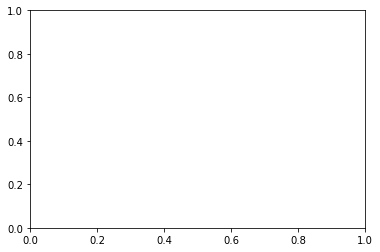

In [38]:
fig,ax=plt.subplots()
ax = pd.Series(lr["lr"].coef_[0], index=xcols).plot.barh()
ax.set_xlabel("Weight",size=13)
ax.set_ylabel("Feature",size=13)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Figure 3: Logistic Regression Coefficients", pad=20,size=15)
fig.tight_layout()
fig.savefig('fig3.png')